# Iris dataset

Setup and data loading

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 42
# Plot style: use Arial font and line width 1
plt.rcParams.update({'font.family':'Arial','lines.linewidth':1})
sns.set_theme(style="whitegrid", rc={'font.family':'Arial'})
df = pd.read_csv("iris/Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Exploratory Data Analysis

Shape: (150, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Species counts:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


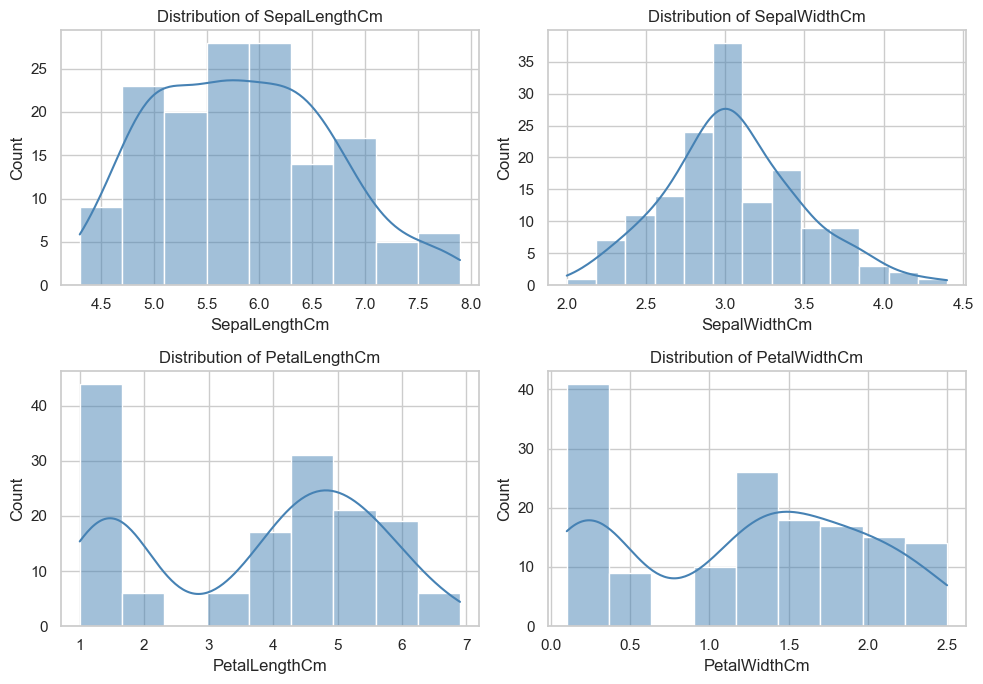

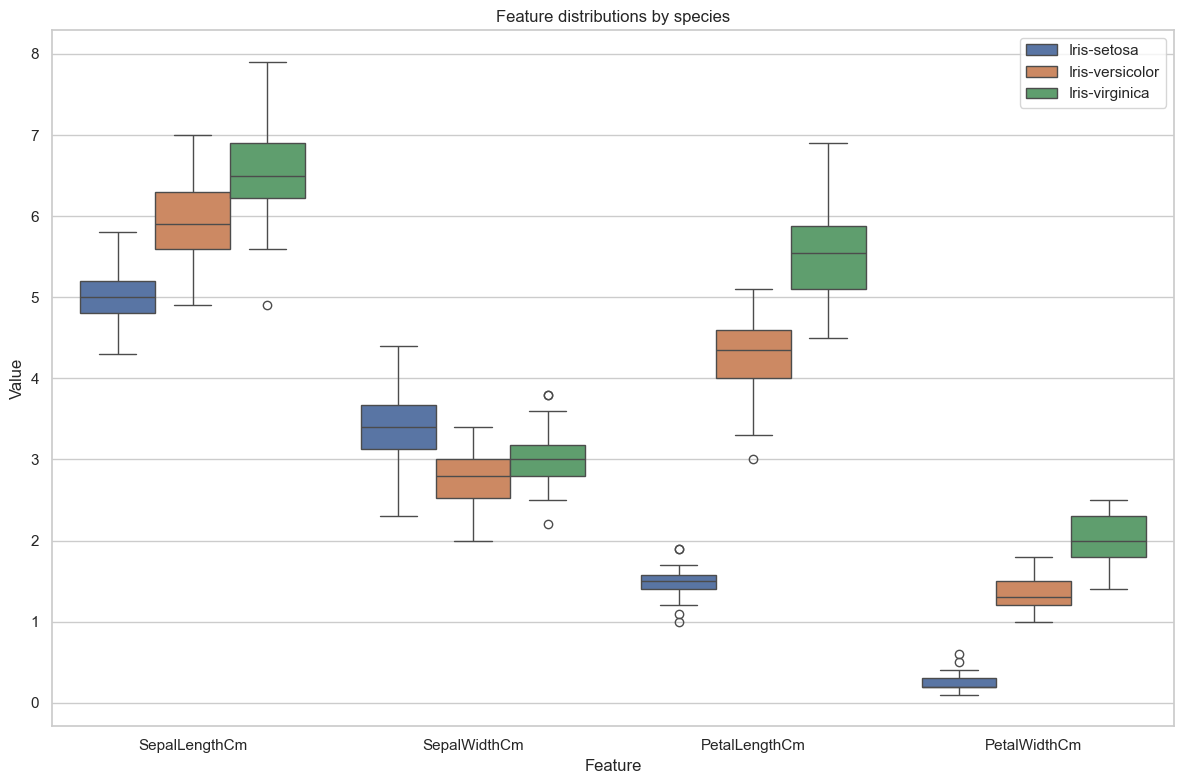

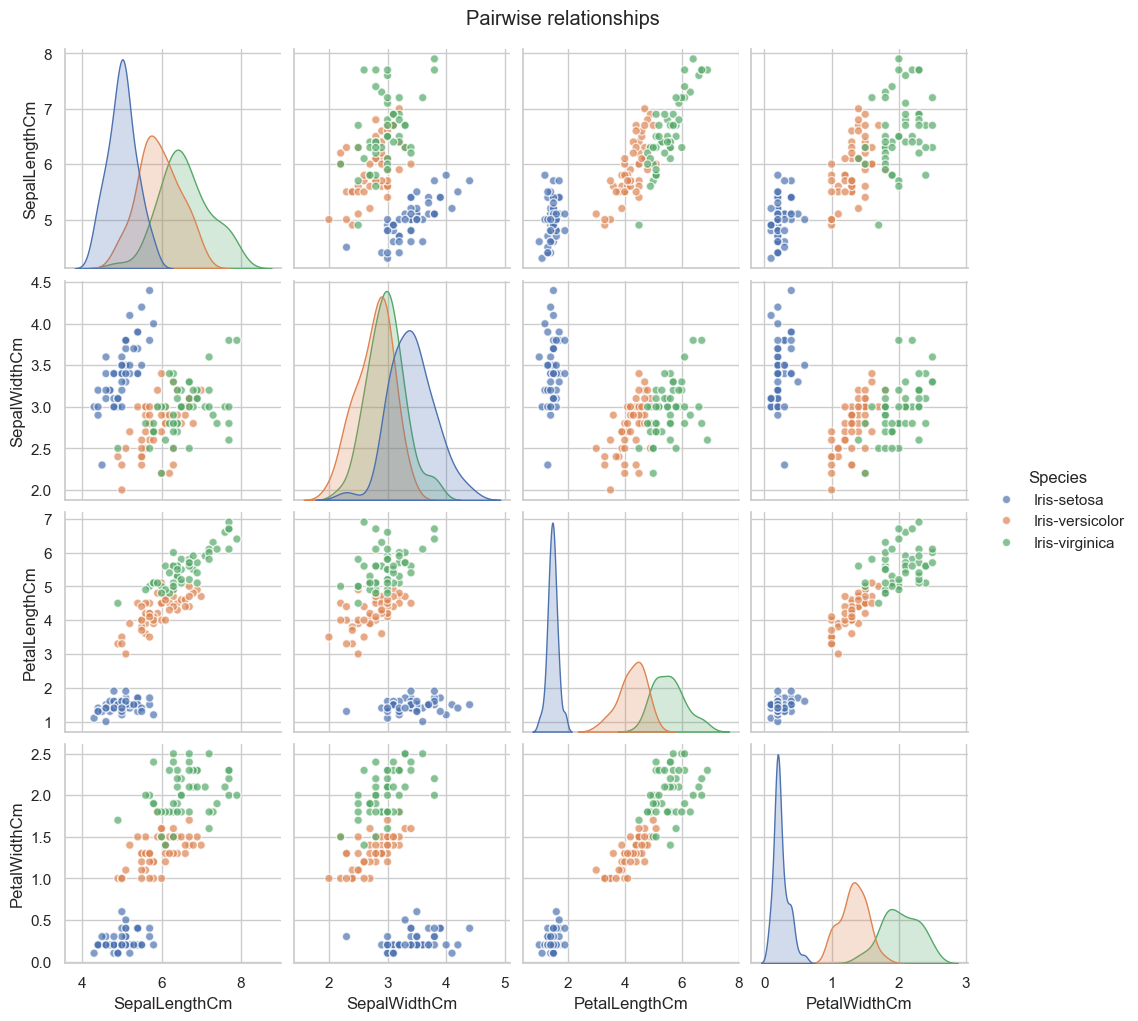

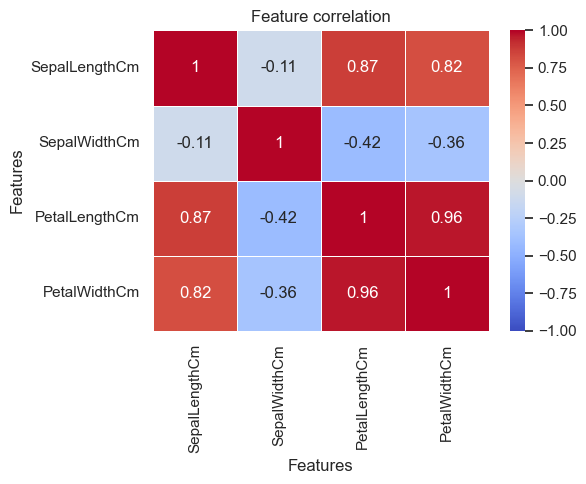

In [9]:
# Basic structure
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSpecies counts:")
print(df["Species"].value_counts())

# Descriptive statistics
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
df[features].describe()

# Histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
for ax, col in zip(axes.ravel(), features):
    sns.histplot(df[col], kde=True, ax=ax, color="steelblue", linewidth=1)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig('iris_histograms.ebs', format='png')
plt.show()

# Boxplots per species
plt.figure(figsize=(12, 8))
melted = df.melt(id_vars="Species", value_vars=features, var_name="Feature", value_name="Value")
sns.boxplot(data=melted, x="Feature", y="Value", hue="Species", linewidth=1)
plt.title("Feature distributions by species")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('iris_boxplots.ebs', format='png')
plt.show()

# Pairplot
g = sns.pairplot(df, hue="Species", vars=features, diag_kind="kde", plot_kws={"alpha":0.7, "linewidth":1}, diag_kws={"linewidth":1})
g.fig.suptitle("Pairwise relationships", y=1.02)
# save pairplot
try:
    g.savefig('iris_pairplot.ebs', format='png')
except Exception:
    pass
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 5))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Feature correlation")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('iris_heatmap.ebs', format='png')
plt.show()

# Loan approval prediction

In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("loan/loan_approval_dataset.csv")

# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (4269, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 

            loan_id   no_of_dependents  education  self_employed  \
count   4269.000000        4269.000000       4269           4269   
unique          NaN                NaN          2              2   
top             NaN                NaN   Graduate            Yes   
freq            NaN                NaN       2144           2150   
mean    2135.000000           2.498712        NaN            NaN   
std     1232.498479           1.695910        NaN            NaN   
min        1.000000           0.000000        NaN            NaN   
25%     1068.000000           1.000000        NaN            NaN   
50%     2135.000000           3.000000        NaN            NaN   
75%     3202.000000           4.000000        NaN            NaN   
max     4269.000000           5.000000        NaN            NaN   

         income_annum   loan_amount    loan_term   cibil_score  \
count    4.269000e+03  4.269000e+03  4269.000000   4269.000000   
unique            NaN           NaN          NaN   

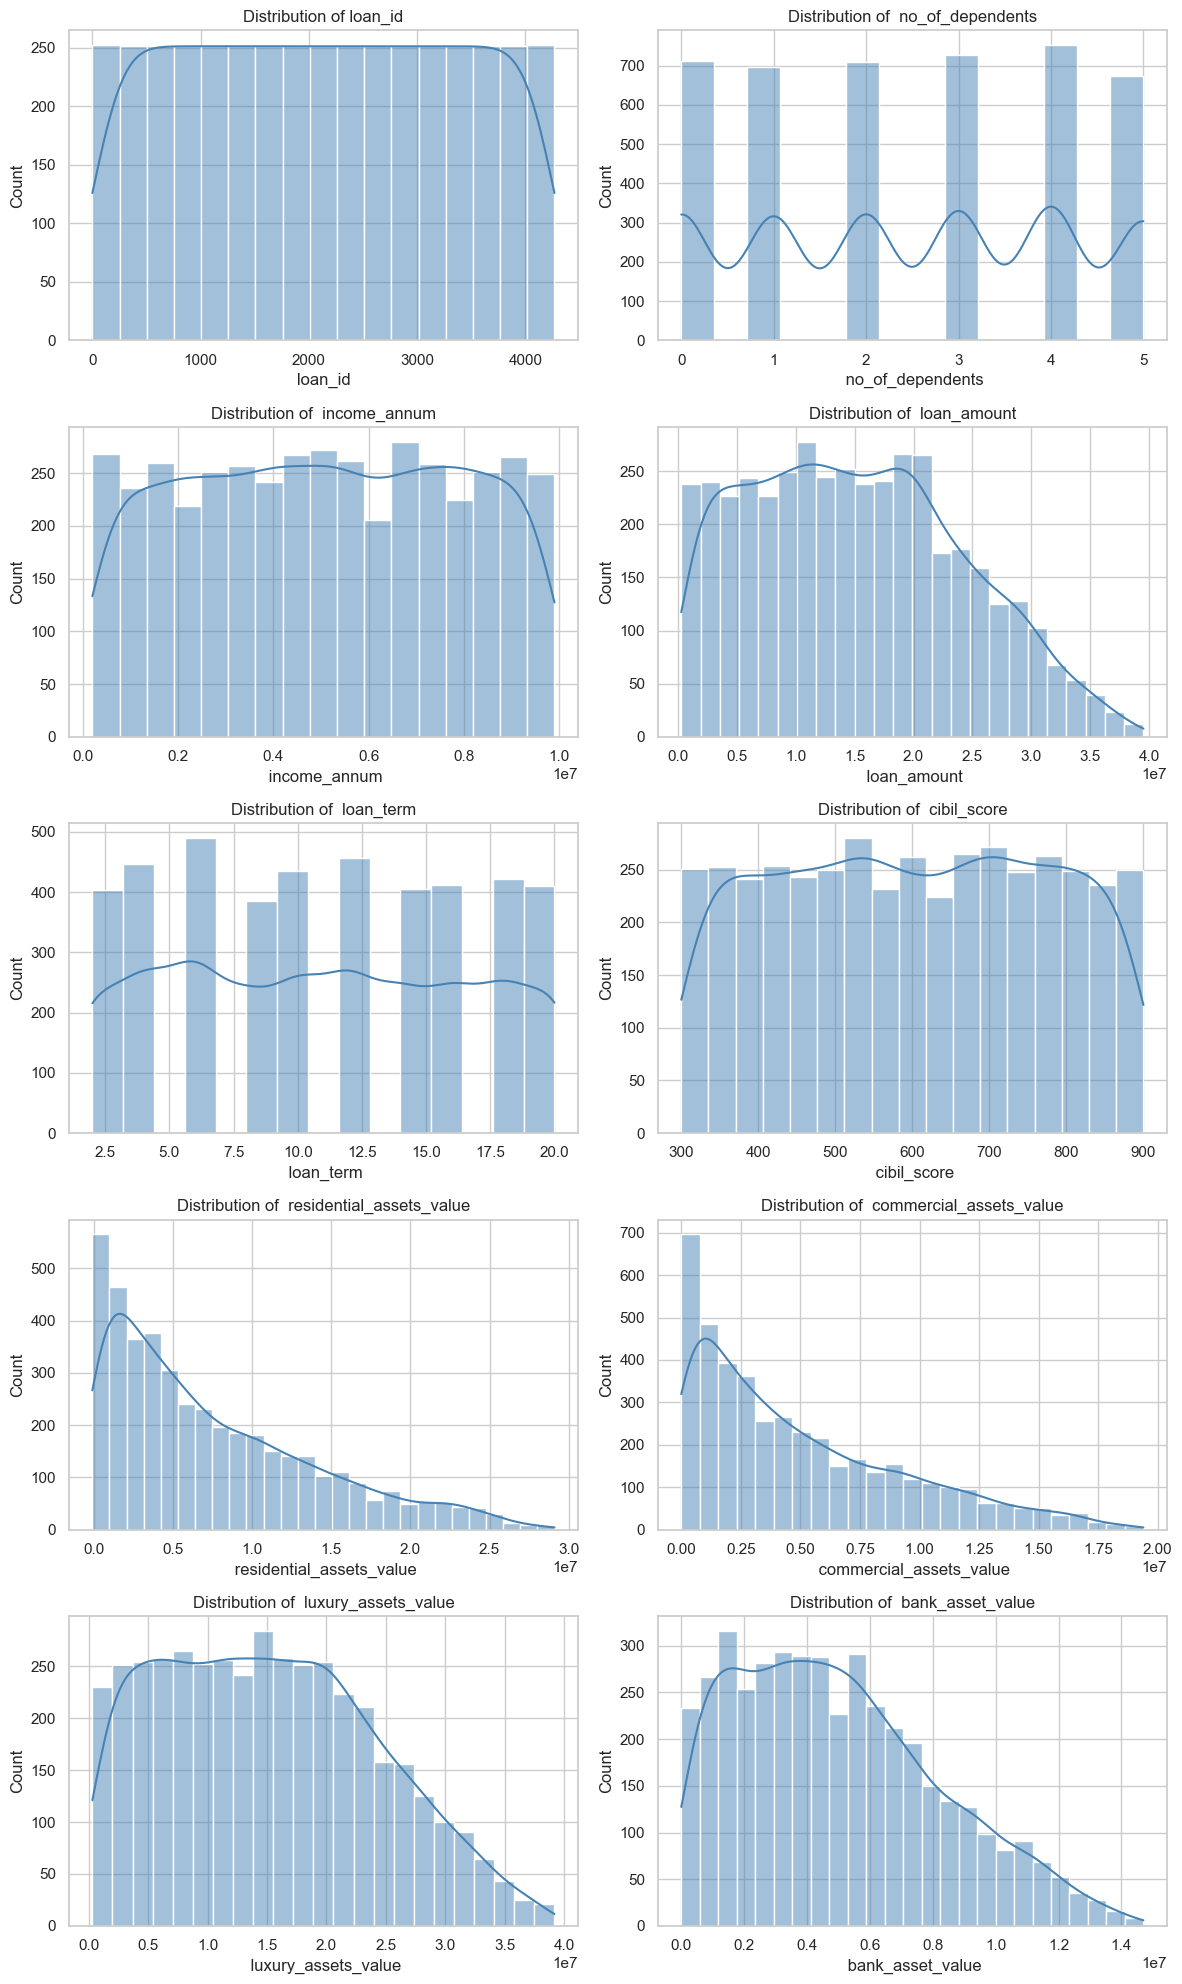

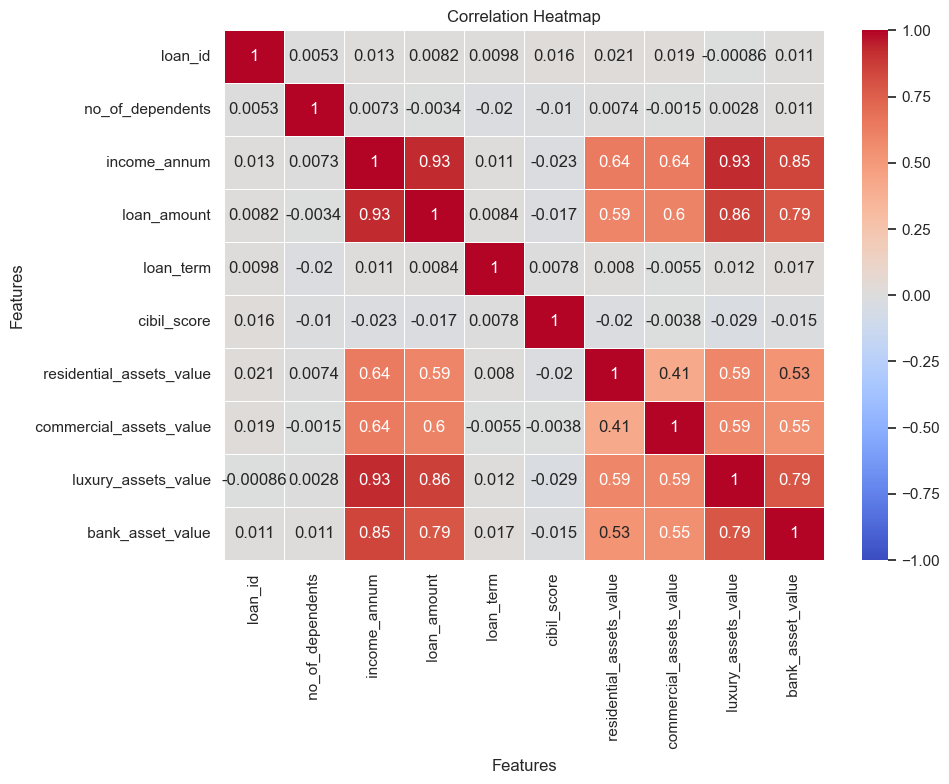

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe(include="all"))

# Distribution plots for numeric features
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
# arrange histograms into a grid (2 columns)
cols = 2
rows = (len(numeric_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.ravel() if hasattr(axes, 'ravel') else [axes]
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue", linewidth=1)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
# hide unused axes
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()
plt.savefig('loan_numeric_histograms.ebs', format='png')
plt.show()

# Boxplots for numeric features grouped by target (if 'Loan_Status' exists)
if "Loan_Status" in df.columns:
    # create a grid of boxplots: one subplot per feature
    cols = 2
    rows = (len(numeric_cols) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = axes.ravel() if hasattr(axes, 'ravel') else [axes]
    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x='Loan_Status', y=col, ax=axes[i], linewidth=1)
        axes[i].set_title(f"{col} by Loan_Status")
        axes[i].set_xlabel('Loan_Status')
        axes[i].set_ylabel(col)
    for j in range(i+1, len(axes)):
        try:
            fig.delaxes(axes[j])
        except Exception:
            pass
    plt.tight_layout()
    plt.savefig('loan_boxplots_by_status.ebs', format='png')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('loan_correlation_heatmap.ebs', format='png')
plt.show()

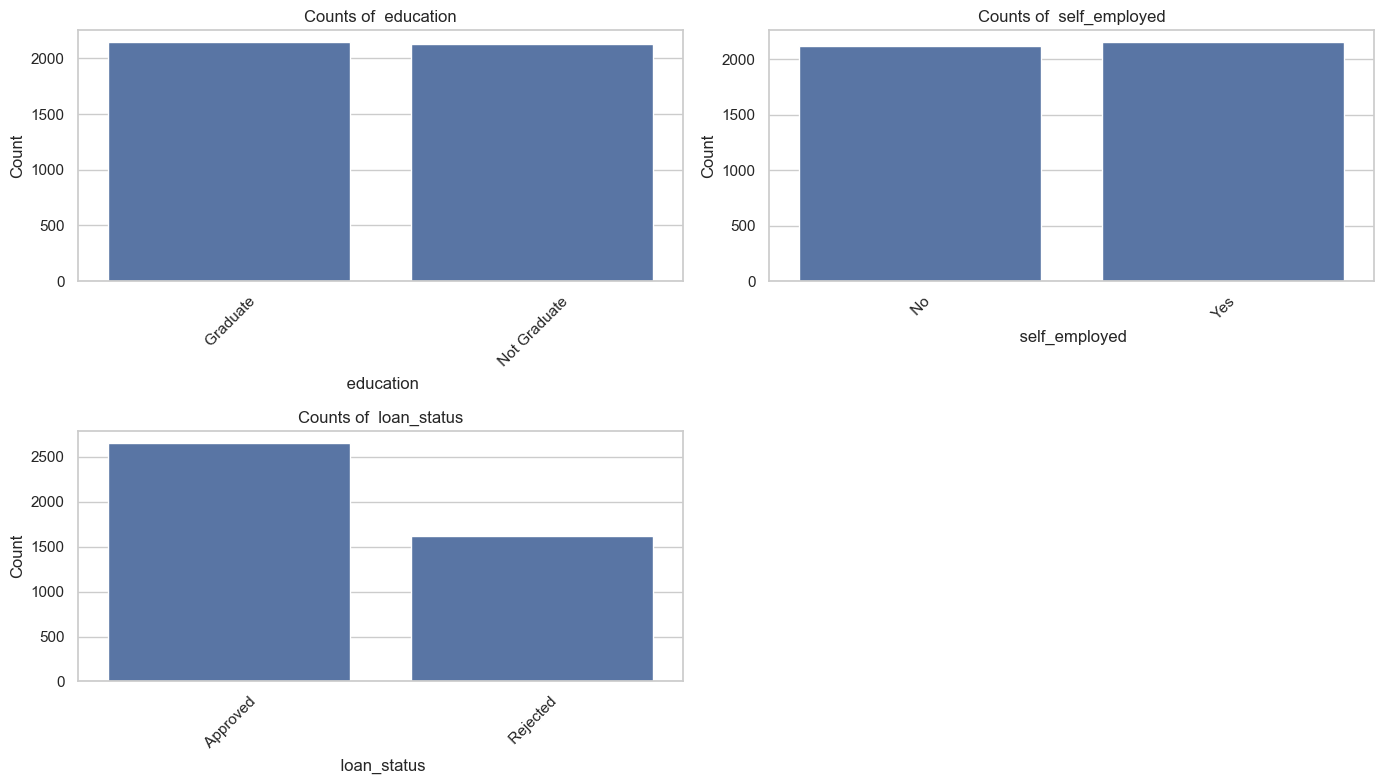

In [12]:
categorical_cols = df.select_dtypes(include=["object"]).columns

cats = list(categorical_cols)
# plot countplots in 2x2 grids
for i in range(0, len(cats), 4):
    chunk = cats[i:i+4]
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes_flat = axes.ravel()
    for j, col in enumerate(chunk):
        sns.countplot(data=df, x=col, hue=("Loan_Status" if "Loan_Status" in df.columns else None), ax=axes_flat[j])
        axes_flat[j].set_title(f"Counts of {col}")
        axes_flat[j].set_xlabel(col)
        axes_flat[j].set_ylabel("Count")
        axes_flat[j].tick_params(axis='x', rotation=45)
    # hide unused axes
    for k in range(len(chunk), 4):
        fig.delaxes(axes_flat[k])
    plt.tight_layout()
    plt.savefig(f'loan_categorical_{i//4}.ebs', format='png')
    plt.show()

# Diabetes

Shape: (100000, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male

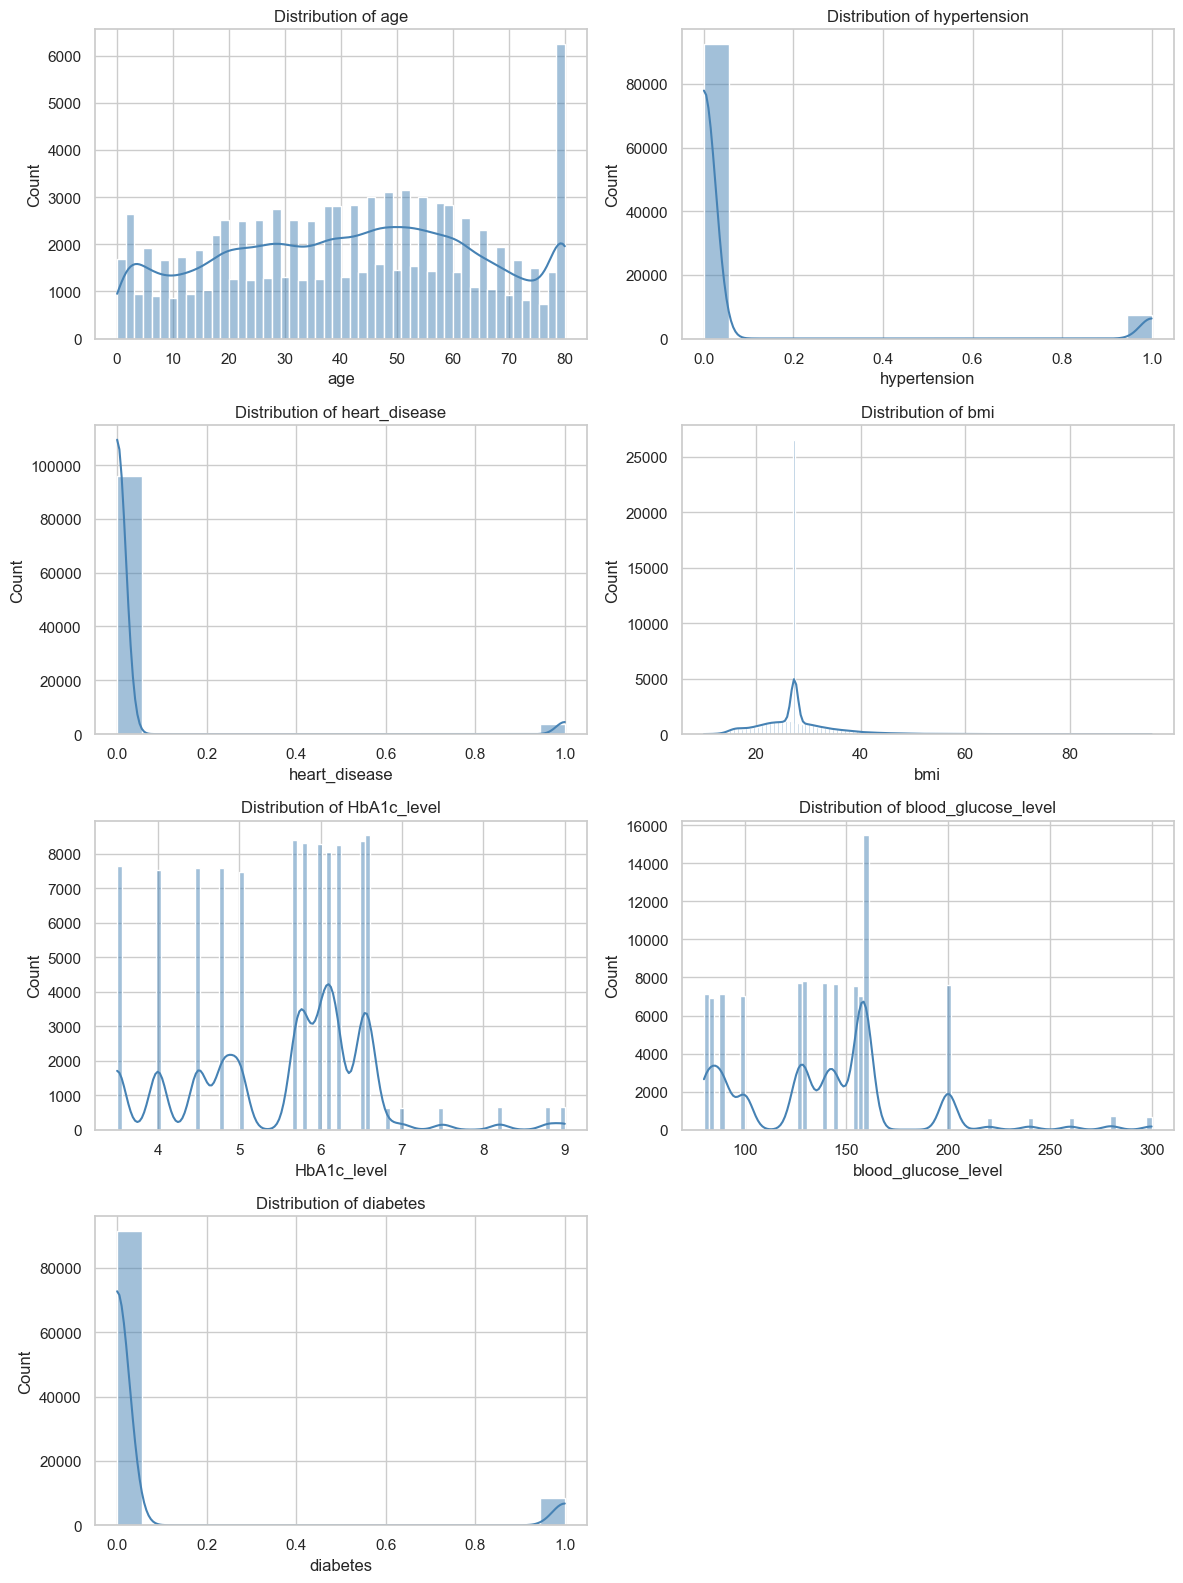

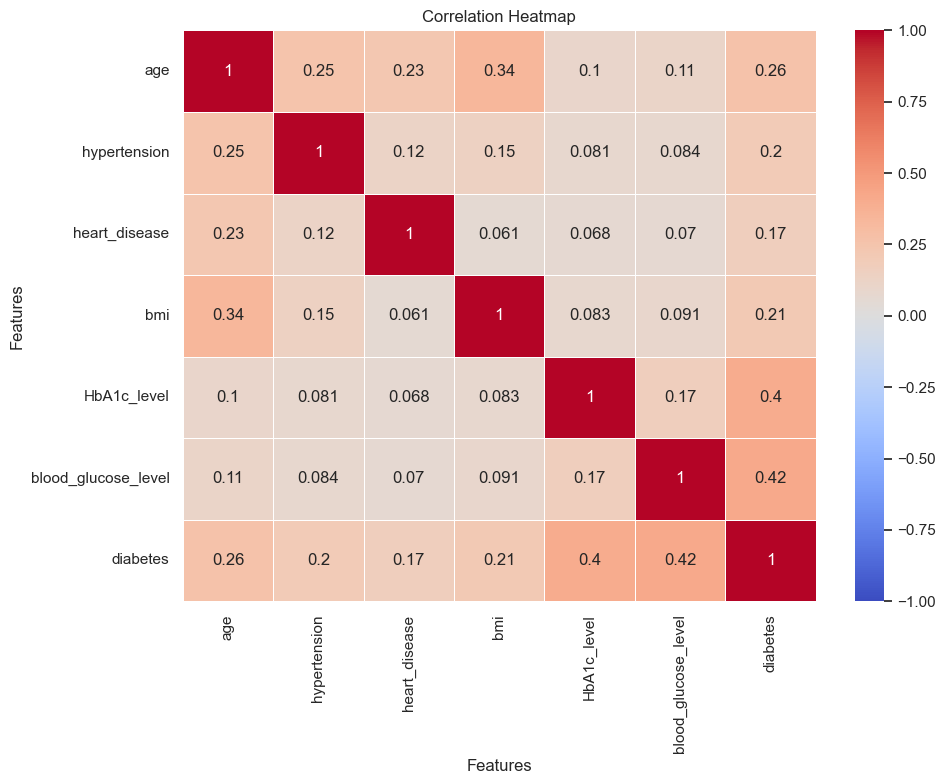

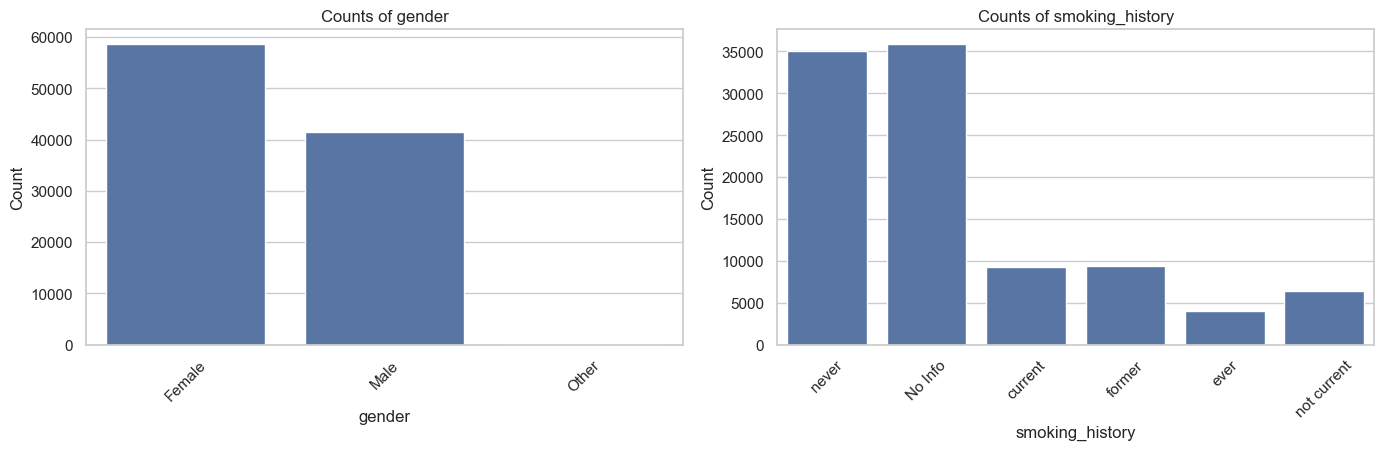

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes/diabetes_prediction_dataset.csv")

# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe(include="all"))

# Numeric feature distributions
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
cols = 2
rows = (len(numeric_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
axes = axes.ravel() if hasattr(axes, 'ravel') else [axes]
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue", linewidth=1)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()
plt.savefig('diabetes_numeric_histograms.ebs', format='png')
plt.show()

# Boxplots grouped by target (assuming 'Outcome' column exists)
if "Outcome" in df.columns:
    cols = 2
    rows = (len(numeric_cols) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = axes.ravel() if hasattr(axes, 'ravel') else [axes]
    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x='Outcome', y=col, ax=axes[i], linewidth=1)
        axes[i].set_title(f"{col} by Outcome")
        axes[i].set_xlabel('Outcome')
        axes[i].set_ylabel(col)
    for j in range(i+1, len(axes)):
        try:
            fig.delaxes(axes[j])
        except Exception:
            pass
    plt.tight_layout()
    plt.savefig('diabetes_boxplots_by_outcome.ebs', format='png')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('diabetes_correlation_heatmap.ebs', format='png')
plt.show()

# Categorical features in 2x2 grids
categorical_cols = df.select_dtypes(include=["object"]).columns
cats = list(categorical_cols)
for i in range(0, len(cats), 4):
    chunk = cats[i:i+4]
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes_flat = axes.ravel()
    for j, col in enumerate(chunk):
        sns.countplot(data=df, x=col, hue=("Outcome" if "Outcome" in df.columns else None), ax=axes_flat[j])
        axes_flat[j].set_title(f"Counts of {col}")
        axes_flat[j].set_xlabel(col)
        axes_flat[j].set_ylabel("Count")
        axes_flat[j].tick_params(axis='x', rotation=45)
    for k in range(len(chunk), 4):
        fig.delaxes(axes_flat[k])
    plt.tight_layout()
    plt.savefig(f'diabetes_categorical_{i//4}.ebs', format='png')
    plt.show()


# Email  Spam

Shape: (5573, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First 5 rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Missing values per column:
Category    0
Message     0
dtype: int64

Summary statistics:
       Category                 Message
count      5573                    5573
unique        3                    5158
top         ham  Sorry, I'll call later
freq       4825                    

C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 146 (\x92) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 148 (\x94) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 145 (\x91) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 150 (\x96) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\raman\AppData\Local\Temp\ipykernel_24308\3639703152.py:93: UserWarning: Glyph 37413 (\N{CJK UNIFIED IDEOGRAPH-9225

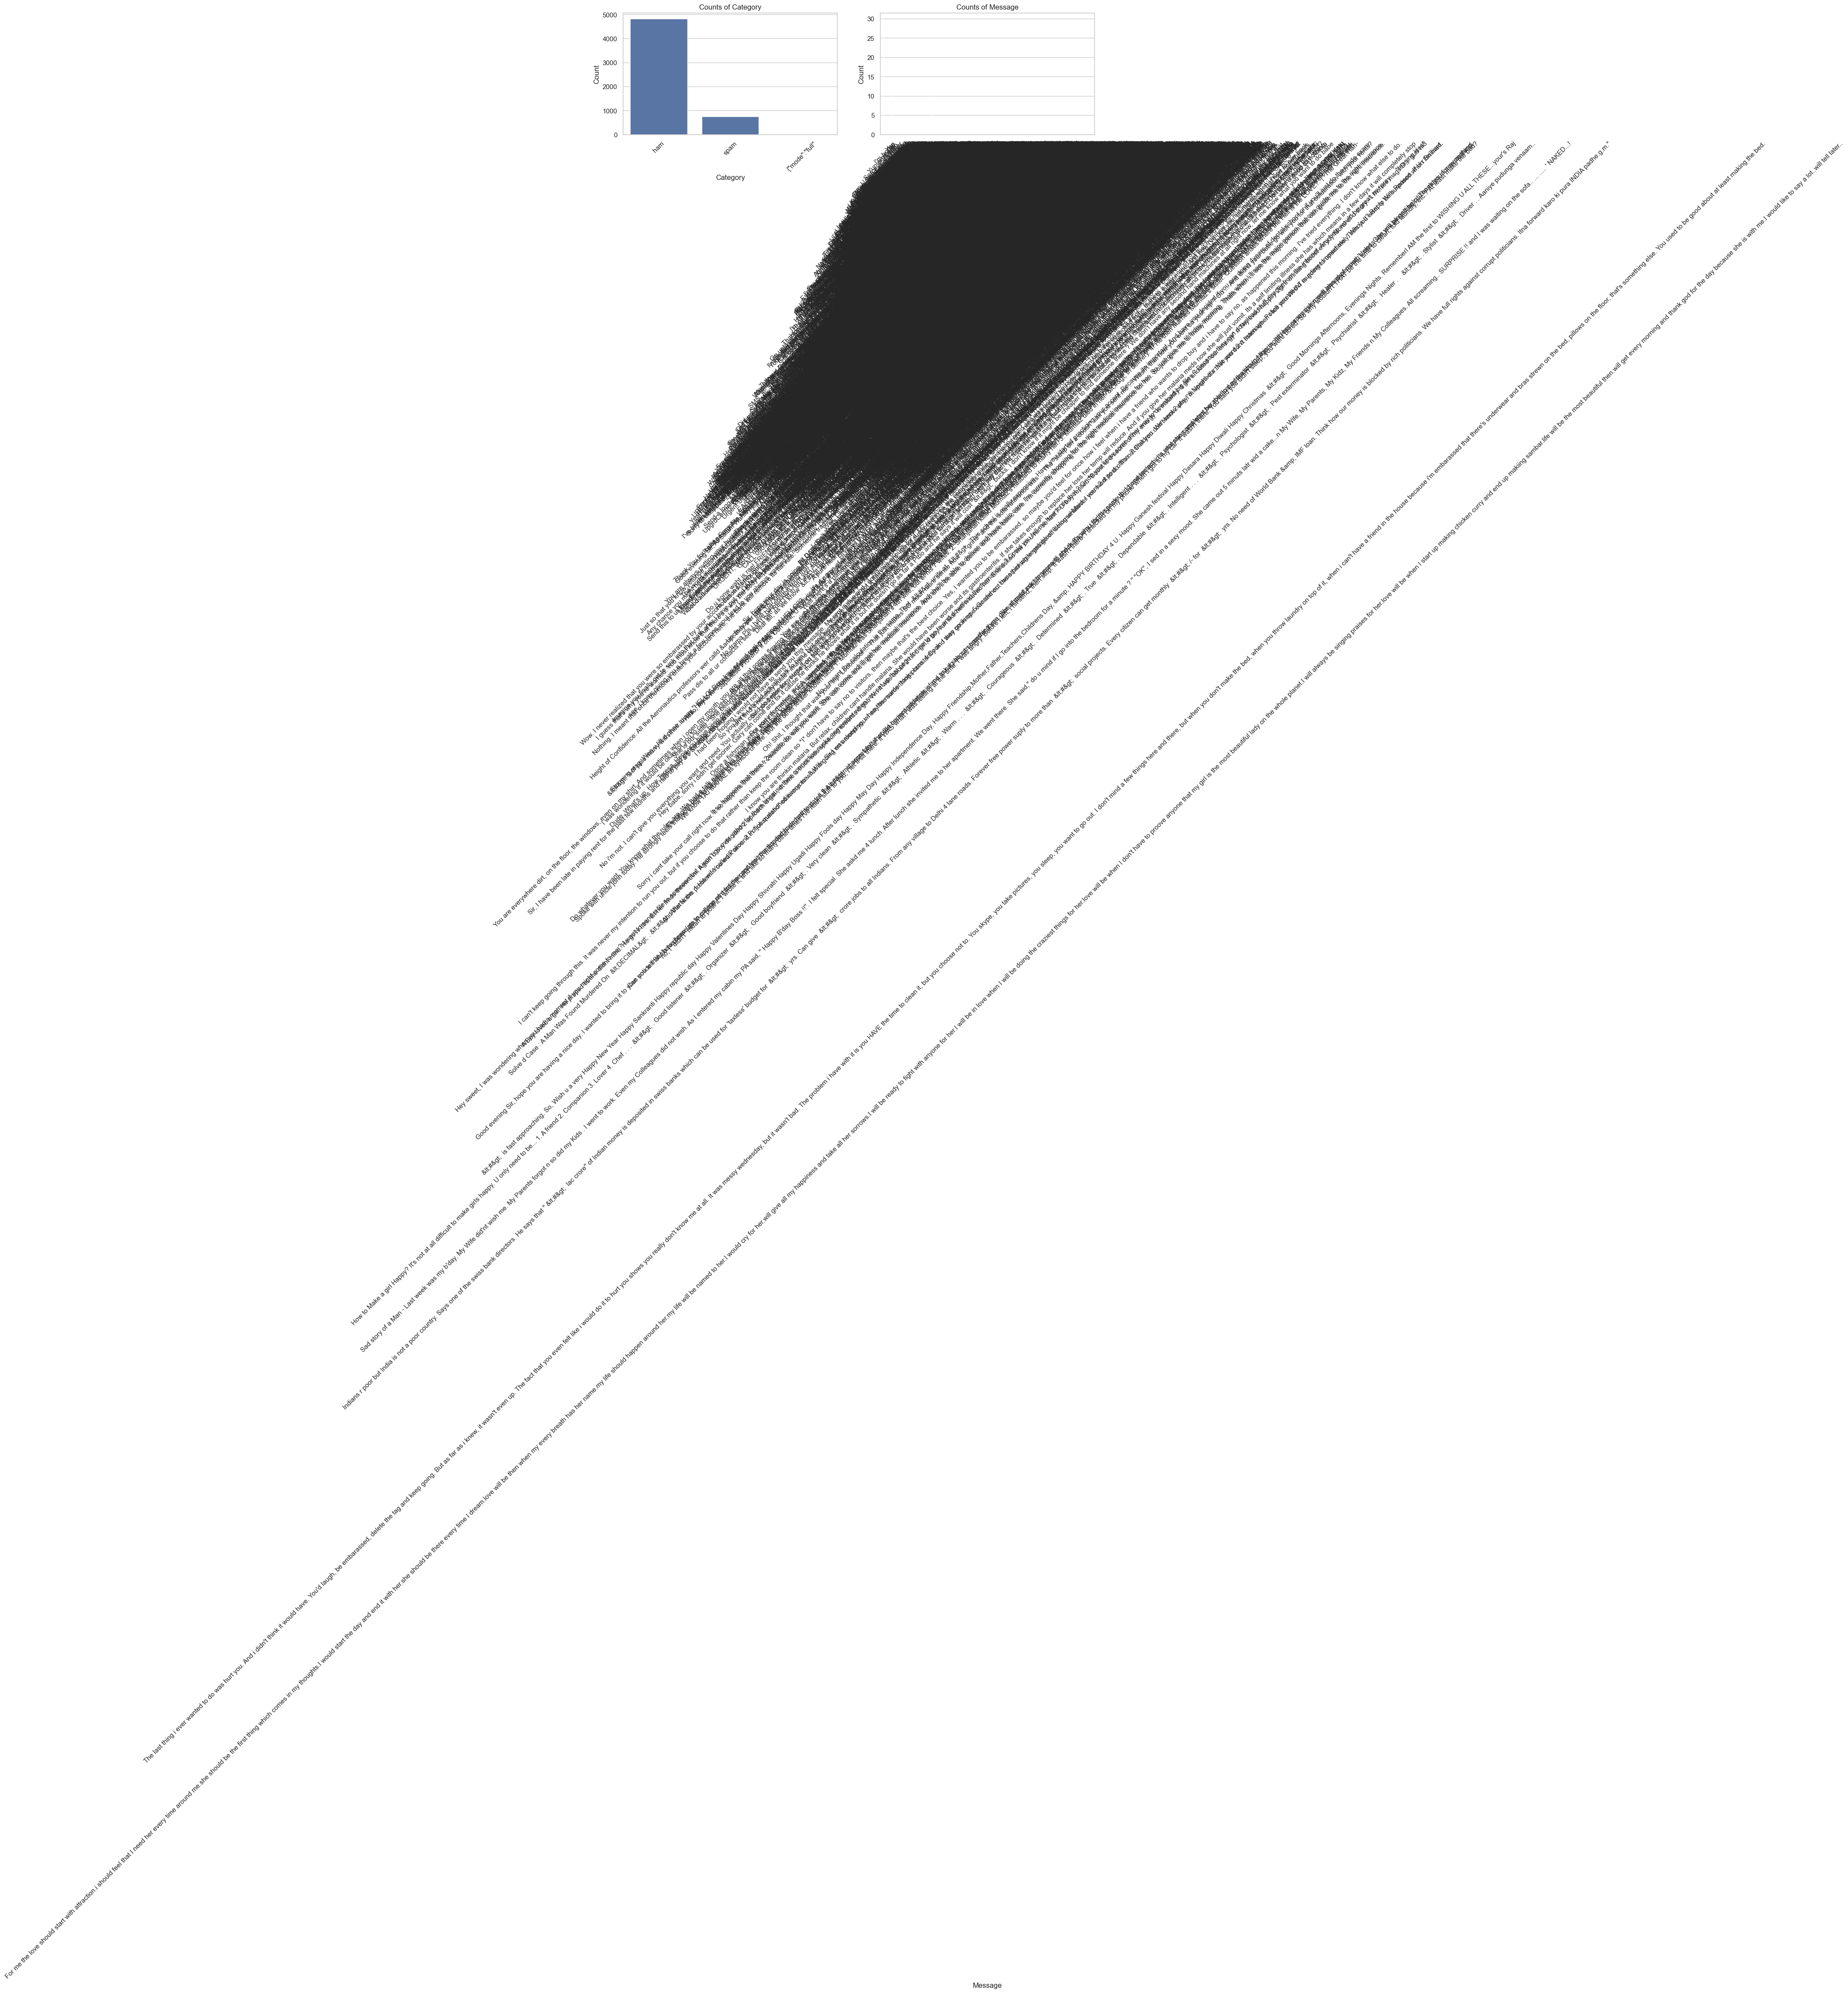

In [14]:
# ============================
# 1. Import libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# ============================
# 2. Load dataset
# ============================
# Replace with your dataset filename
df = pd.read_csv("spam/email.csv")

# ============================
# 3. Basic inspection
# ============================
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

# ============================
# 4. Summary statistics
# ============================
print("\nSummary statistics:")
print(df.describe(include="all"))

# ============================
# 5. Numeric feature analysis
# ============================
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

if len(numeric_cols) > 0:
    cols = 2
    rows = math.ceil(len(numeric_cols)/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4*rows))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color="steelblue", linewidth=1)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

    # Hide unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig('spam_numeric_histograms.ebs', format='png')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.savefig('spam_correlation_heatmap.ebs', format='png')
    plt.show()
else:
    print("No numeric columns found in dataset.")

# ============================
# 6. Categorical feature analysis
# ============================
categorical_cols = df.select_dtypes(include=["object"]).columns
cats = list(categorical_cols)
for i in range(0, len(cats), 4):
    chunk = cats[i:i+4]
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    axes_flat = axes.ravel()
    for j, col in enumerate(chunk):
        if "Label" in df.columns or "Outcome" in df.columns:
            target = "Label" if "Label" in df.columns else "Outcome"
            sns.countplot(data=df, x=col, hue=target, ax=axes_flat[j])
        else:
            sns.countplot(data=df, x=col, ax=axes_flat[j])
        axes_flat[j].set_title(f"Counts of {col}")
        axes_flat[j].set_xlabel(col)
        axes_flat[j].set_ylabel("Count")
        axes_flat[j].tick_params(axis='x', rotation=45)
    for k in range(len(chunk), 4):
        fig.delaxes(axes_flat[k])
    plt.tight_layout()
    plt.savefig(f'spam_categorical_{i//4}.ebs', format='png')
    plt.show()


# Handwritten recognition

Shape: (3410, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB
None

First 5 rows:
                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0

Missing values per column:
image    0
label    0
dtype: int64


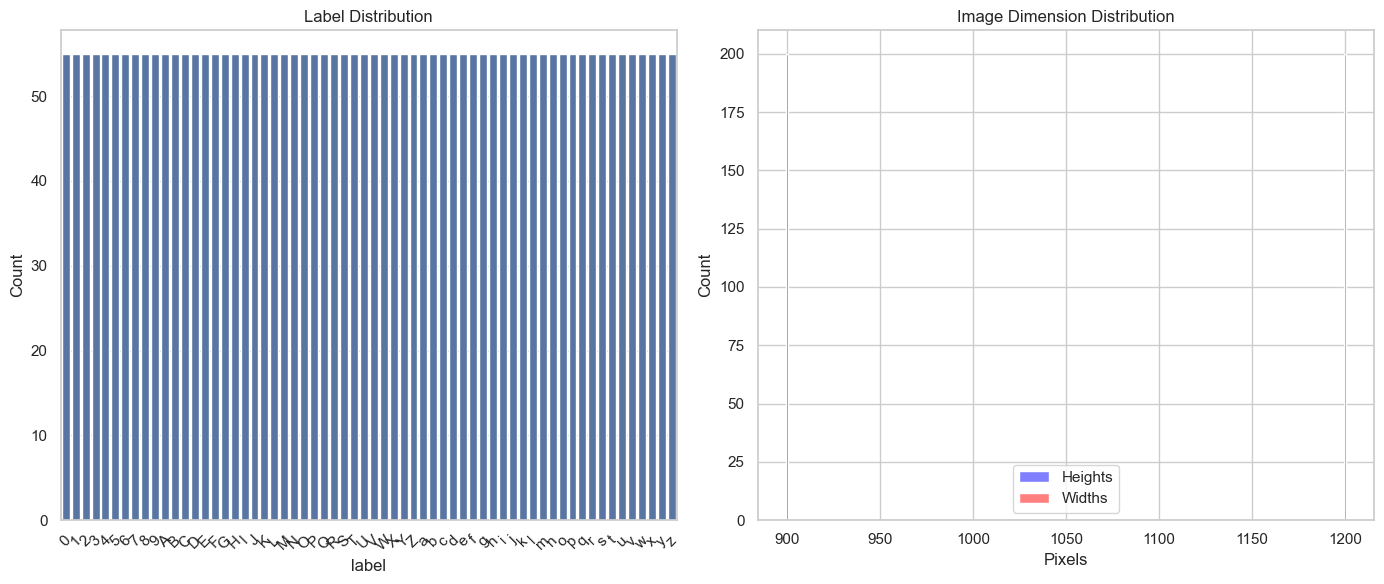

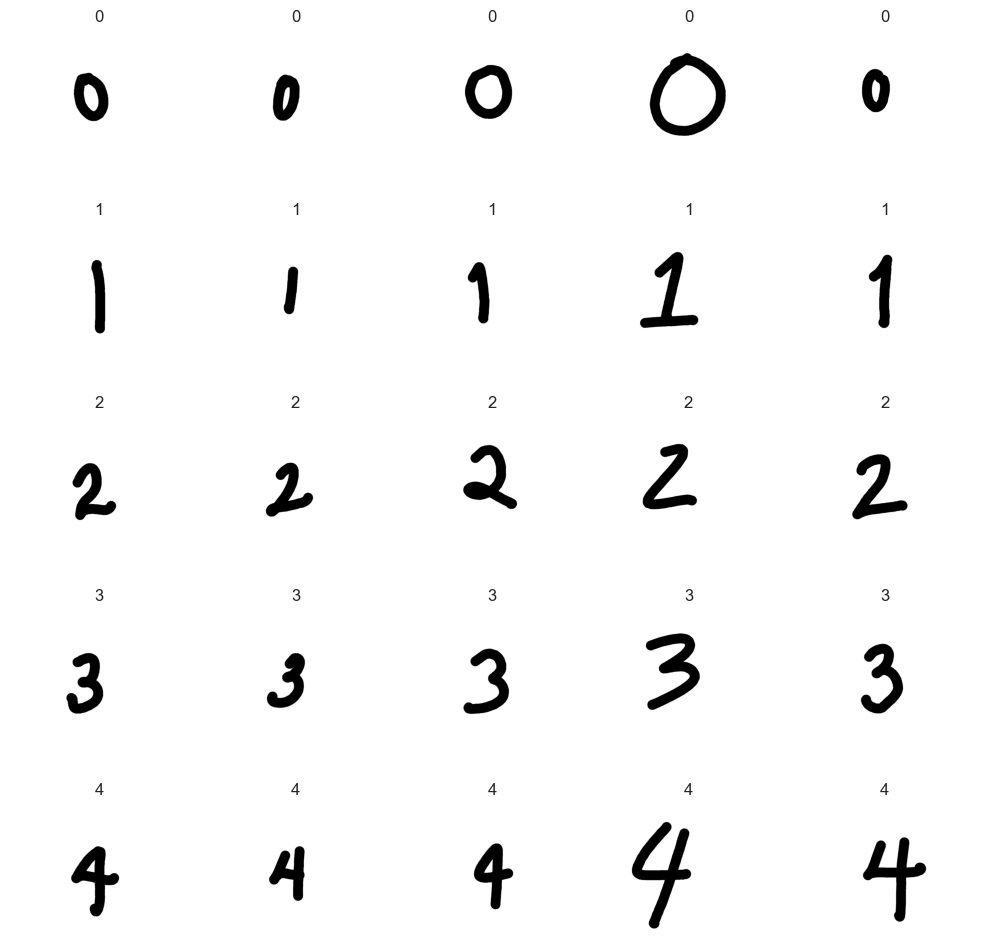

In [15]:
# ============================
# 1. Import libraries
# ============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import math

# ============================
# 2. Load dataset
# ============================
df = pd.read_csv("handwritten/english.csv")

# Basic inspection
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

# ============================
# 3. Label distribution and image-dimension overview (1x2 grid)
# ============================
heights, widths = [], []
for img_path in df["image"].sample(min(200, len(df)), random_state=42):
    if os.path.exists("handwritten/"+img_path):
        img = cv2.imread("handwritten/"+img_path)
        if img is not None:
            h, w = img.shape[:2]
            heights.append(h)
            widths.append(w)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# label distribution on left
sns.countplot(data=df, x="label", order=df["label"].value_counts().index, ax=axes[0])
axes[0].set_title("Label Distribution")
axes[0].set_xlabel("label")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# image dimension distributions on right
sns.histplot(heights, kde=True, color="blue", label="Heights", ax=axes[1], linewidth=1)
sns.histplot(widths, kde=True, color="red", label="Widths", ax=axes[1], linewidth=1)
axes[1].legend()
axes[1].set_title("Image Dimension Distribution")
axes[1].set_xlabel("Pixels")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.savefig('handwritten_overview.ebs', format='png')
plt.show()

# ============================
# 4. Preview sample images
# ============================
def show_samples(df, labels, samples_per_label=5):
    fig, axes = plt.subplots(len(labels), samples_per_label, 
                             figsize=(samples_per_label*2, len(labels)*2))
    for i, label in enumerate(labels):
        subset = df[df["label"] == label].sample(samples_per_label, random_state=42)
        for j, img_path in enumerate(subset["image"].values):
            if os.path.exists("handwritten/"+img_path):
                img = cv2.imread("handwritten/"+img_path, cv2.IMREAD_GRAYSCALE)
                axes[i, j].imshow(img, cmap="gray")
                axes[i, j].axis("off")
                axes[i, j].set_title(str(label))
            else:
                axes[i, j].text(0.5, 0.5, "Missing", ha="center", va="center")
                axes[i, j].axis("off")
    plt.tight_layout()
    plt.show()

# Example: show samples for first 5 labels
unique_labels = df["label"].unique()
show_samples(df, unique_labels[:5], samples_per_label=5)
